In [1]:
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from plotting_tempelate import plot_bench_bars

In [2]:
# Load data files into a big dictioanry
raw_data = {}
# methods = []
for file in os.listdir("."):
    if file.endswith('.csv'):
        name = '_'.join((file.split('.')[0]).split('_')[2:])
        # print(name)
        raw_data[name] = pd.read_csv(os.path.join(file))
        # methods.append(name)

# methods.sort(reverse=True)
# print(methods)
methods = ['ECMP_ASP', 'ECMP_APST4', 'OPT', 'MP_ASP', 'MP_APST4', 'IT']

In [3]:
# the key of each file:
# OPT: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_OPT,Phi_NEXU[Gbps],init_time[s],solving_time[s],peak_RAM[MB]

# MP: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_MP_ASP,Phi_NEXU[Gbps],init_time[s],solving_time[s],peak_RAM[MB]

# IT: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_IT,Phi_NEXU[Gbps],method1_times[s],method1_peak_RAMs[MB],method1_results[Gbps],method2_time[s],method2_attempts,method2_peak_RAM[MB]


In [4]:
def plot_for_V_D(V:int, D:int):
    plot_data = {
        'uniform': [],
        'shift_1': [],
        'shift_quater': [],
        'shift_half': [],
        'diagonal_1': [],
        'diagonal_quater': []
    }
    y_counter = {}.fromkeys(methods, 0) # for each method, add up the y values
    for traffic_pattern, _data in plot_data.items():
        # TODO: baseline should be OPT
        baseline = (raw_data["MP_APST4"][(raw_data["MP_APST4"]["V"]==V) & (raw_data["MP_APST4"]["traffic_pattern"]==traffic_pattern)])["Phi_NEXU[Gbps]"].values[0]
        # baseline = (raw_data["OPT"][(raw_data["OPT"]["V"]==49) & (raw_data["OPT"]["traffic_pattern"]=="uniform")])["Phi_NEXU[Gbps]"].values[0]
        for method_name in methods:
            if method_name == "ECMP_ASP":
                _value = raw_data["MP_ASP"][(raw_data["MP_ASP"]["V"]==V) & (raw_data["MP_ASP"]["traffic_pattern"]==traffic_pattern)]["Phi_ECMP_ASP[Gbps]"].values[0]
                plot_data[traffic_pattern].append(_value/baseline)
            elif method_name == "ECMP_APST4":
                _value = raw_data["MP_APST4"][(raw_data["MP_APST4"]["V"]==V) & (raw_data["MP_APST4"]["traffic_pattern"]==traffic_pattern)]["Phi_ECMP_APST4[Gbps]"].values[0]
                plot_data[traffic_pattern].append(_value/baseline)
            elif method_name == "OPT":
                _value = raw_data[method_name][(raw_data[method_name]["V"]==V) & (raw_data[method_name]["traffic_pattern"]==traffic_pattern)]["Phi_NEXU[Gbps]"].values
                if len(_value):
                    _value = _value[0]
                else:
                    _value = 0
                plot_data[traffic_pattern].append(_value/baseline)
            else:
                _value = raw_data[method_name][(raw_data[method_name]["V"]==V) & (raw_data[method_name]["traffic_pattern"]==traffic_pattern)]["Phi_NEXU[Gbps]"].values[0]
                plot_data[traffic_pattern].append(_value/baseline)
            
            y_counter[method_name] += _value
            

    # Ave_over_traffic_patterns = np.zeros(len(methods))
    # for i, _data in enumerate(list(plot_data.values())):
    #     Ave_over_traffic_patterns[i] += _data[i]/len(plot_data)
        
    plot_data['average'] = np.array(list(y_counter.values()))/np.max(list(y_counter.values()))
    plot_bench_bars(plot_data, methods, f"RRG({V},{D})", "traffic demand patterns", "Normalized Phi", normalized=True)

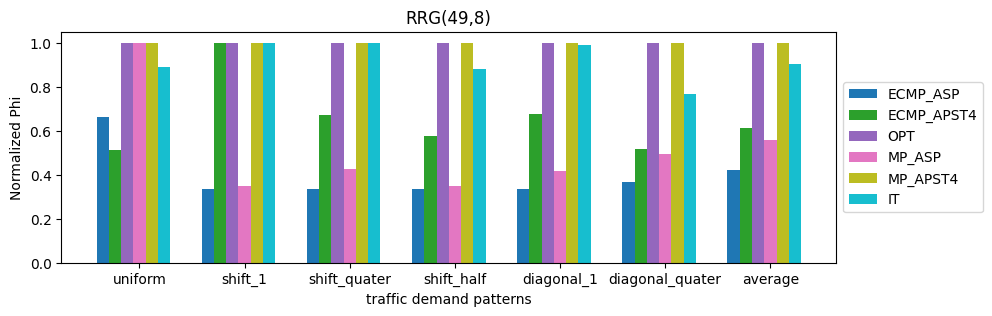

In [5]:
plot_for_V_D(49,8)

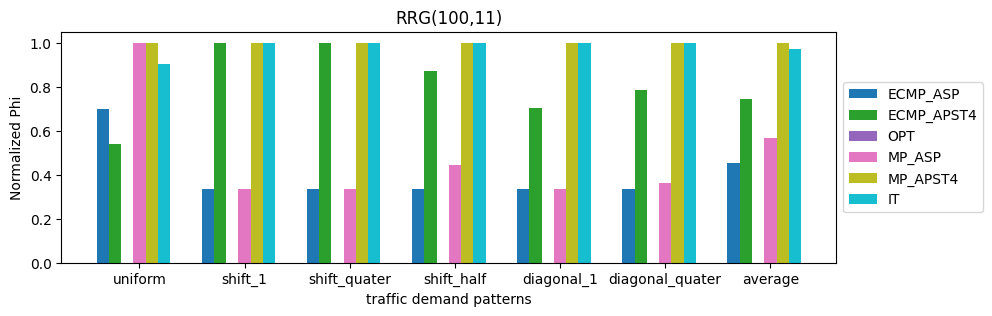

In [6]:
plot_for_V_D(100, 11)